In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)

In [18]:
frequency = pd.read_csv('frequency_dataset.csv', encoding='utf-8')
print(frequency.shape)
print(frequency.columns)
print(frequency.isna().sum())
frequency.head()

(235932, 8)
Index(['POLICY_NO', 'DATE OF \r\nACCIDENT', 'AGE', 'REG', 'DRV_DLI_AGE',
       'BODY', 'MAKE', 'VEH_SEATS'],
      dtype='object')
POLICY_NO                    0
DATE OF \r\nACCIDENT    176669
AGE                          0
REG                          0
DRV_DLI_AGE                  0
BODY                         0
MAKE                         0
VEH_SEATS                    0
dtype: int64


,POLICY_NO,DATE OF \r\nACCIDENT,AGE,REG,DRV_DLI_AGE,BODY,MAKE,VEH_SEATS
0,102048936,2015-03-11,26.000000,DUBAI,8.022349,SALOON,TOYOTA,4.0
1,102048936,2015-06-15,31.000000,DUBAI,8.292969,SALOON,TOYOTA,4.0
2,102048936,2015-03-11,26.000000,DUBAI,8.022349,SALOON,TOYOTA,4.0
3,102048936,2015-03-11,26.000000,DUBAI,8.022349,SALOON,TOYOTA,4.0
4,101509203,NaN,35.219656,DUBAI,36.076109,PICK UP,MITSUBISHI,2.0


In [19]:

frequency.drop_duplicates(
    subset=['POLICY_NO', 'DATE OF \r\nACCIDENT'], inplace=True)
frequency['freq'] = frequency.groupby(
    'POLICY_NO')['DATE OF \r\nACCIDENT'].transform('count')

frequency.drop_duplicates(subset=['POLICY_NO'], inplace=True)
frequency

,POLICY_NO,DATE OF \r\nACCIDENT,AGE,REG,DRV_DLI_AGE,BODY,MAKE,VEH_SEATS,freq
0,102048936,2015-03-11,26.000000,DUBAI,8.022349,SALOON,TOYOTA,4.0,2
4,101509203,NaN,35.219656,DUBAI,36.076109,PICK UP,MITSUBISHI,2.0,0
5,101509204,NaN,35.219656,DUBAI,36.076109,SALOON,TOYOTA,4.0,0
6,102048937,2015-05-24,50.000000,DUBAI,17.602834,VAN,HYUNDAI,8.0,1
7,102048938,2015-03-02,26.000000,DUBAI,8.022349,SALOON,MITSUBISHI,4.0,1
...,...,...,...,...,...,...,...,...,...
235927,102153585,NaN,42.000000,ABU DHABI,14.592745,SUV,PEUGEOT,4.0,0
235928,102153586,NaN,69.000000,DUBAI,37.264887,SALOON,BMW,4.0,0
235929,102153588,NaN,35.000000,DUBAI,7.624914,SALOON,CHEVROLET,4.0,0
235930,102153587,NaN,48.000000,ABU DHABI,3.137577,SALOON,TOYOTA,4.0,0


In [20]:
# drop policy no and date of accident
frequency.drop(['POLICY_NO', 'DATE OF \r\nACCIDENT'], axis=1, inplace=True)
frequency.head()

,AGE,REG,DRV_DLI_AGE,BODY,MAKE,VEH_SEATS,freq
0,26.000000,DUBAI,8.022349,SALOON,TOYOTA,4.0,2
4,35.219656,DUBAI,36.076109,PICK UP,MITSUBISHI,2.0,0
5,35.219656,DUBAI,36.076109,SALOON,TOYOTA,4.0,0
6,50.000000,DUBAI,17.602834,VAN,HYUNDAI,8.0,1
7,26.000000,DUBAI,8.022349,SALOON,MITSUBISHI,4.0,1


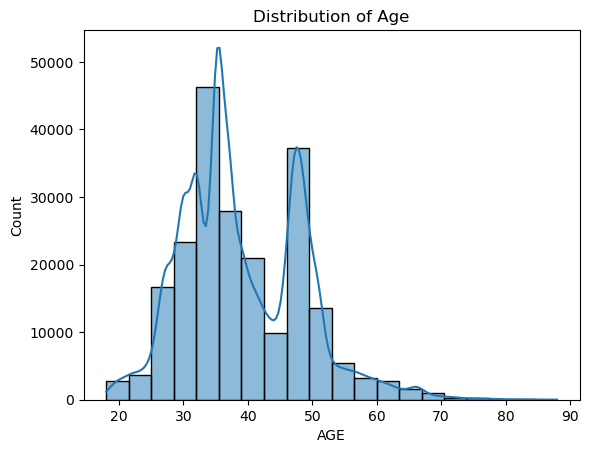

In [21]:
sns.histplot(frequency['AGE'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

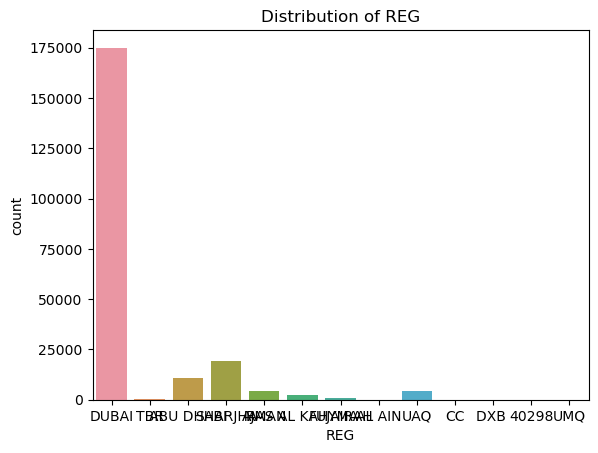

In [22]:
sns.countplot(x='REG', data=frequency)
plt.title('Distribution of REG')
plt.show()

c:\Users\Charbel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


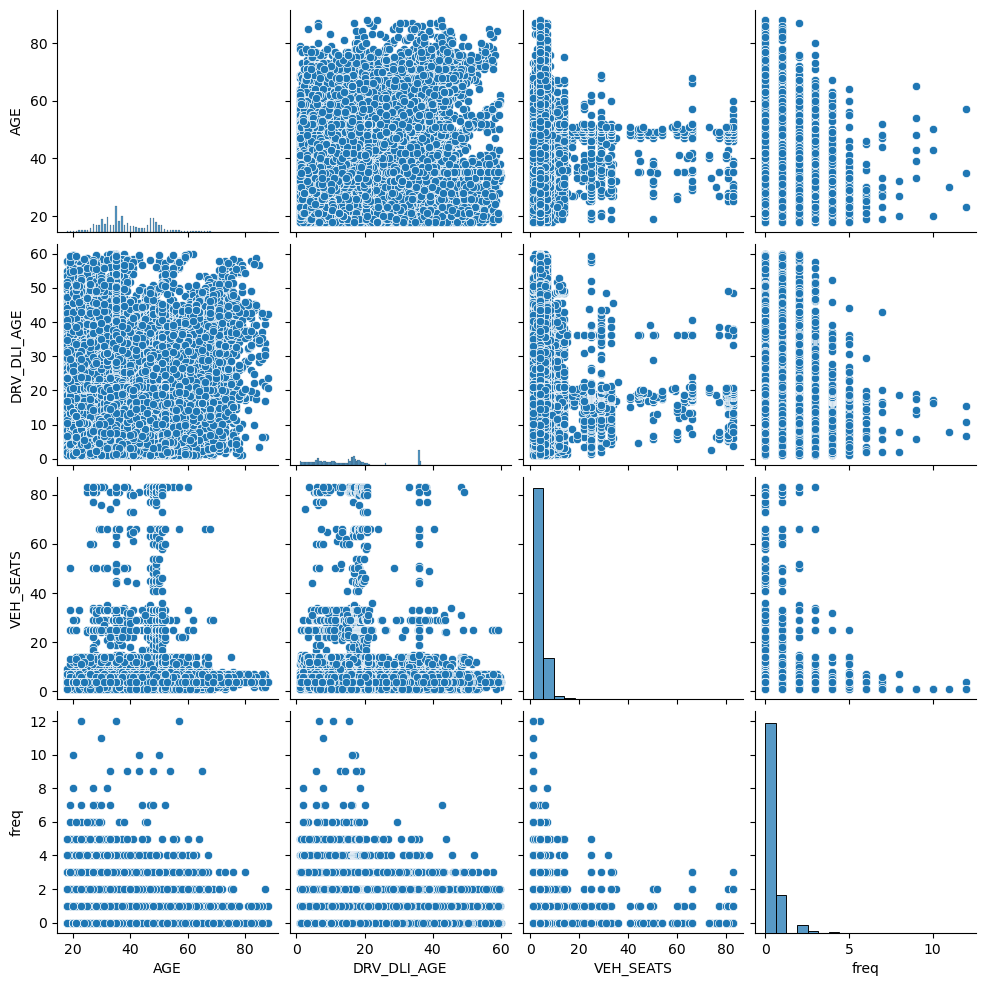

In [23]:
sns.pairplot(frequency[['AGE', 'DRV_DLI_AGE', 'VEH_SEATS', 'freq']])
plt.show()

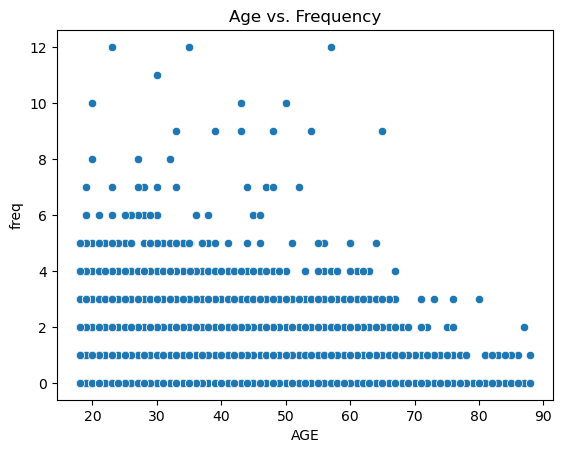

In [24]:
sns.scatterplot(x='AGE', y='freq', data=frequency)
plt.title('Age vs. Frequency')
plt.show()

In [25]:
encoder = LabelEncoder()
encoderColumns = ['REG', 'BODY', 'MAKE']
for i in encoderColumns:
    frequency[i] = encoder.fit_transform(frequency[i])
frequency

,AGE,REG,DRV_DLI_AGE,BODY,MAKE,VEH_SEATS,freq
0,26.000000,5,8.022349,49,187,4.0,2
4,35.219656,5,36.076109,35,135,2.0,0
5,35.219656,5,36.076109,49,187,4.0,0
6,50.000000,5,17.602834,75,84,8.0,1
7,26.000000,5,8.022349,49,135,4.0,1
...,...,...,...,...,...,...,...
235927,42.000000,1,14.592745,60,143,4.0,0
235928,69.000000,5,37.264887,49,16,4.0,0
235929,35.000000,5,7.624914,49,30,4.0,0
235930,48.000000,1,3.137577,49,187,4.0,0


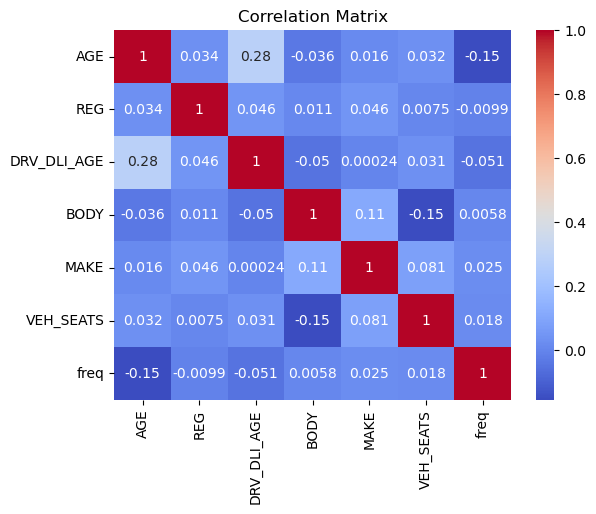

In [26]:
correlation_matrix = frequency.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [27]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# frequency[['AGE', 'VEH_SEATS', 'DRV_DLI_AGE', 'freq']] = scaler.fit_transform(frequency[['AGE', 'VEH_SEATS', 'DRV_DLI_AGE', 'freq']])
# frequency

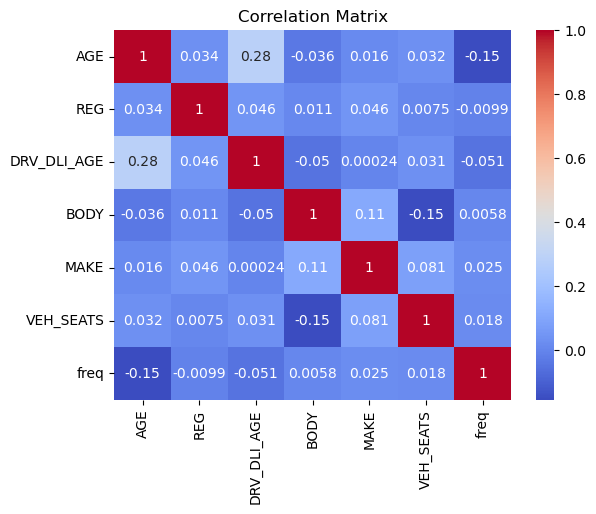

In [28]:
correlation_matrix = frequency.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

c:\Users\Charbel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


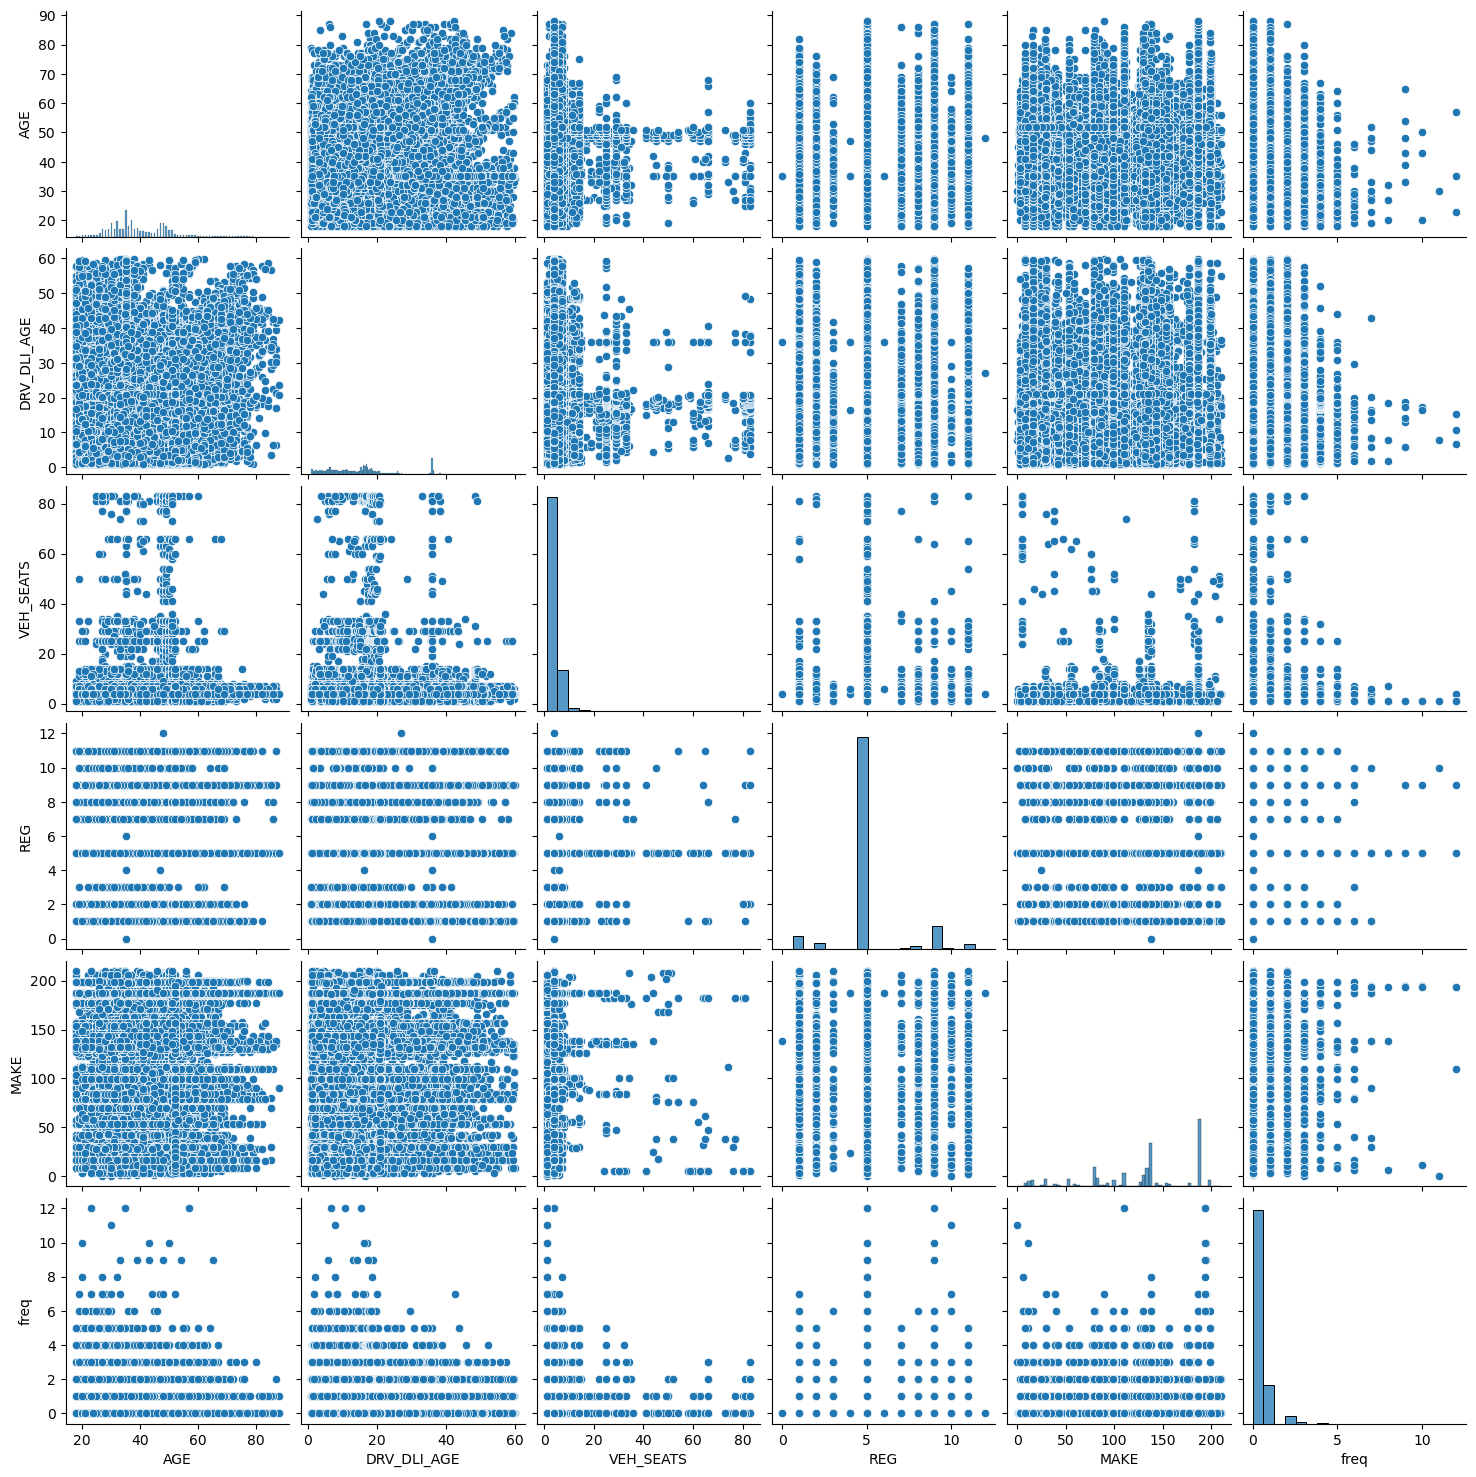

In [29]:
sns.pairplot(frequency[['AGE', 'DRV_DLI_AGE', 'VEH_SEATS', 'REG', 'MAKE' ,'freq']])
plt.show()

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load your dataset
# Assuming your dataset is in a DataFrame called 'df'
# Perform data preprocessing steps here

# Split the data into features (X) and target (y)
X = frequency.drop("freq", axis=1)
y = frequency["freq"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights based on the frequency of each class
class_weights = {val: 1 / count for val, count in zip(y.value_counts().index, y.value_counts().values)}

# Create and train the RandomForestRegressor with class weighting
model = RandomForestRegressor( random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# You can also print feature importances if needed
feature_importances = model.feature_importances_
print("Feature Importances:", feature_importances)


Mean Squared Error: 0.2726475247068885
Feature Importances: [0.16469744 0.04819788 0.50410618 0.0812846  0.14735443 0.05435948]


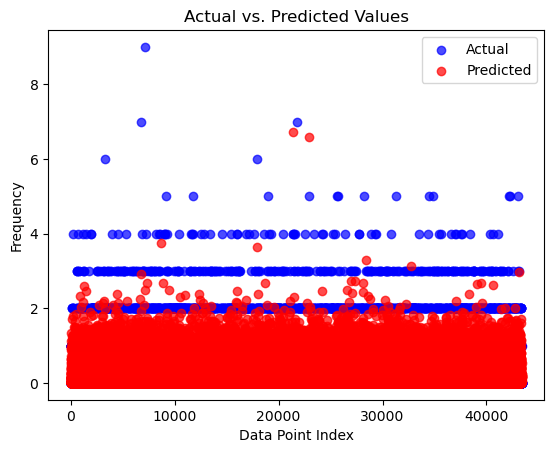

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'y_test' contains the actual values and 'predictions' contains the predicted values
# You already have these from your RandomForestRegressor model

# Create an array of indices for the x-axis
indices = np.arange(len(y_test))

# Plot actual values
plt.scatter(indices, y_test, label='Actual', color='blue', alpha=0.7)

# Plot predicted values
plt.scatter(indices, predictions, label='Predicted', color='red', alpha=0.7)

# Add labels and title
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Frequency')
plt.legend()

plt.show()
